In [1]:
try:
    from sklearnex import patch_sklearn, unpatch_sklearn
    patch_sklearn()
except:
    pass

Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


## 電力消費量と各列の相関関係
電力消費量と各列（"temperature","sunhour1","sunhour2","insolation","month","hour","dayofweek"）<br>
の相関関係を散布図で表示します。電力消費量と気温は非線形の相関関係（２次関数的）がありそうな感じがします。

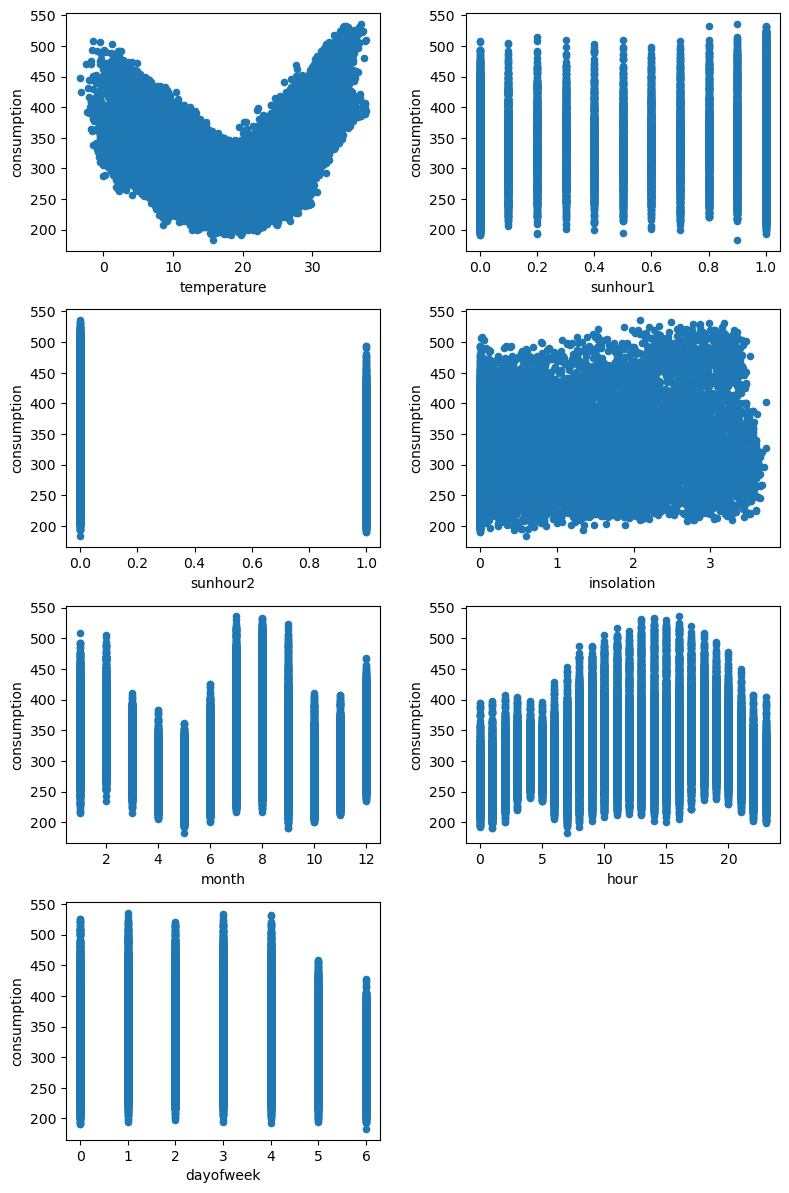

In [2]:
# coding: utf-8
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# 四国電力の電力消費量データを読み込み
ed = [pd.read_csv(
    'data/juyo_shikoku_{:d}.csv'.format(year),
    skiprows=3,
    names=['DATE', 'TIME', 'consumption'],
    parse_dates={'date_hour': ['DATE', 'TIME']},
    index_col = "date_hour")
    for year in [2017, 2018, 2019, 2020]
]
elec_data = pd.concat(ed)

# 複数年の気象データを読み込み
tp = [pd.read_csv(
    './data/takamatsu{:d}.csv'.format(year),
    skiprows=5,
    names=['DATETIME', 'temperature', 'temperature2', 'temperature3', 
           'sunhour1','sunhour2','sunhour3','sunhour4',
           'insolation','insolation2','insolation3',
           'humid','humid2','humid3'],
    parse_dates={'date_hour': ["DATETIME"]},
    index_col='date_hour')
    for year in [2017, 2018, 2019, 2020]
]

tmp = pd.concat(tp)

# 月, 日, 時の取得
tmp["month"] = tmp.index.month
tmp['day'] = tmp.index.day
tmp['dayofyear'] = tmp.index.dayofyear
tmp['hour'] = tmp.index.hour
tmp['dayofweek'] = tmp.index.dayofweek

# 気象データと電力消費量データをいったん統合して時間軸を合わせたうえで、再度分割
#variable = ["temperature","sunhour1","month","hour"]
variable = ["temperature","sunhour1","sunhour2","insolation","month","hour","dayofweek"]
# variable = ["temperature","month","hour","dayofweek"]
takamatsu_wthr = elec_data.join(tmp[variable]).dropna()

plt.figure(figsize=(8,12))

for n, col in enumerate(takamatsu_wthr.columns[1:]):
    plt.subplot(4,2,(n+1))
    takamatsu_wthr.plot(ax=plt.gca(), kind='scatter', x = col, y = 'consumption')

plt.tight_layout()
plt.show()

## 相関係数
temperatureは２次関数的な非線形関係なので相関係数は小さくなります。このような場合は相関図で関係性を調べます。

In [3]:
takamatsu_corr = takamatsu_wthr.corr()["consumption"]
abs_cor = takamatsu_corr.map(abs)
pd.DataFrame(abs_cor.sort_values(ascending=False))

,consumption
consumption,1.000000
sunhour2,0.346283
insolation,0.279774
sunhour1,0.238757
hour,0.234859
dayofweek,0.221952
month,0.093062
temperature,0.012484
